## 1.0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
f_len = 10

## 1.1. Импорт данных

In [2]:
data = pd.read_excel('лаба.xlsx', sheet_name='исходные данные', index_col=0).iloc[:, :-6]
data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,1166,17.6,5.8,23937,-18.0,1.38,4.64,0.60,4.26,0.42
Амурская область,1109,15.7,7.1,33304,0.2,2.50,9.16,0.82,4.15,0.51
Архангельская область,1132,13.6,6.1,35693,-26.0,0.76,4.79,0.73,3.65,0.78
Астраханская область,1122,15.5,5.8,24971,-78.0,1.33,3.90,0.77,2.58,0.84
Белгородская область,1163,7.8,6.7,32352,60.0,0.69,2.61,0.31,1.47,0.47


## 1.2. Стандартизация данных

In [3]:
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,0.480197,0.654258,-0.517762,-0.593885,-0.468984,0.188463,0.058932,-0.337127,1.090805,-1.246125
Амурская область,-0.613109,0.284550,0.877670,0.070693,-0.130889,2.272277,2.472753,0.426103,1.013837,-0.781334
Архангельская область,-0.171950,-0.124076,-0.195739,0.240190,-0.617597,-0.965077,0.139037,0.113872,0.663983,0.613038
Астраханская область,-0.363758,0.245633,-0.517762,-0.520524,-1.583583,0.095435,-0.336251,0.252642,-0.084706,0.922898
Белгородская область,0.422655,-1.252660,0.448306,0.003150,0.979995,-1.095316,-1.025152,-1.343204,-0.861383,-0.987908


## 1.3. Построение дендрограмм

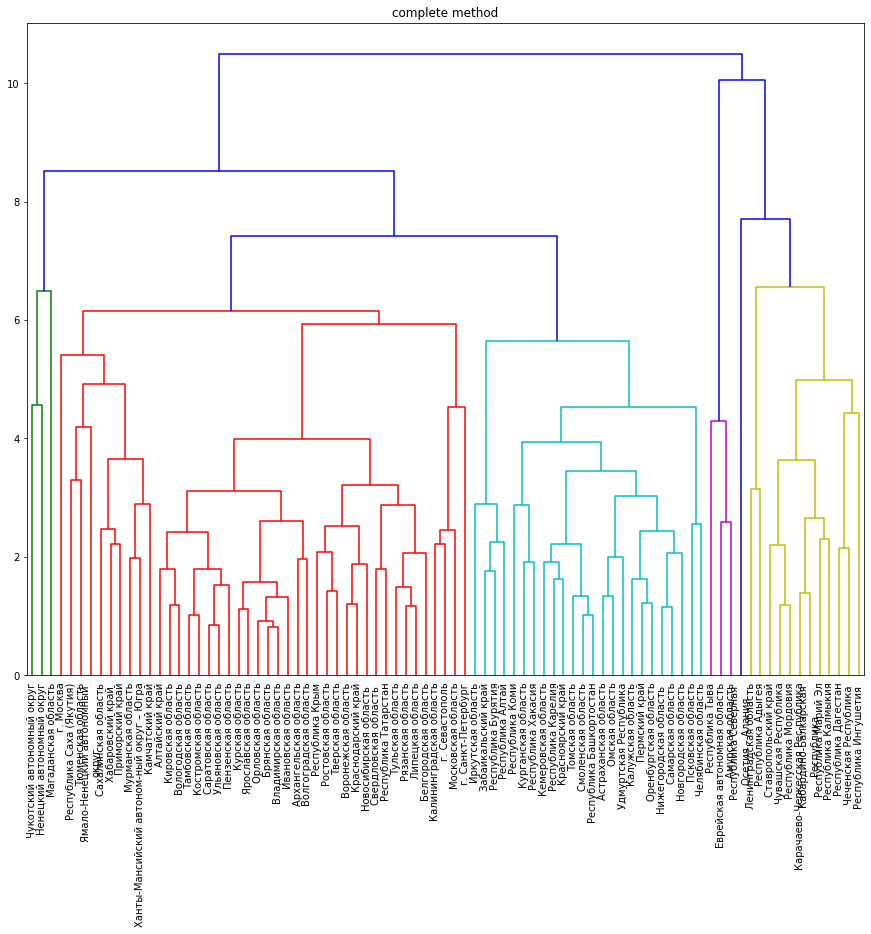

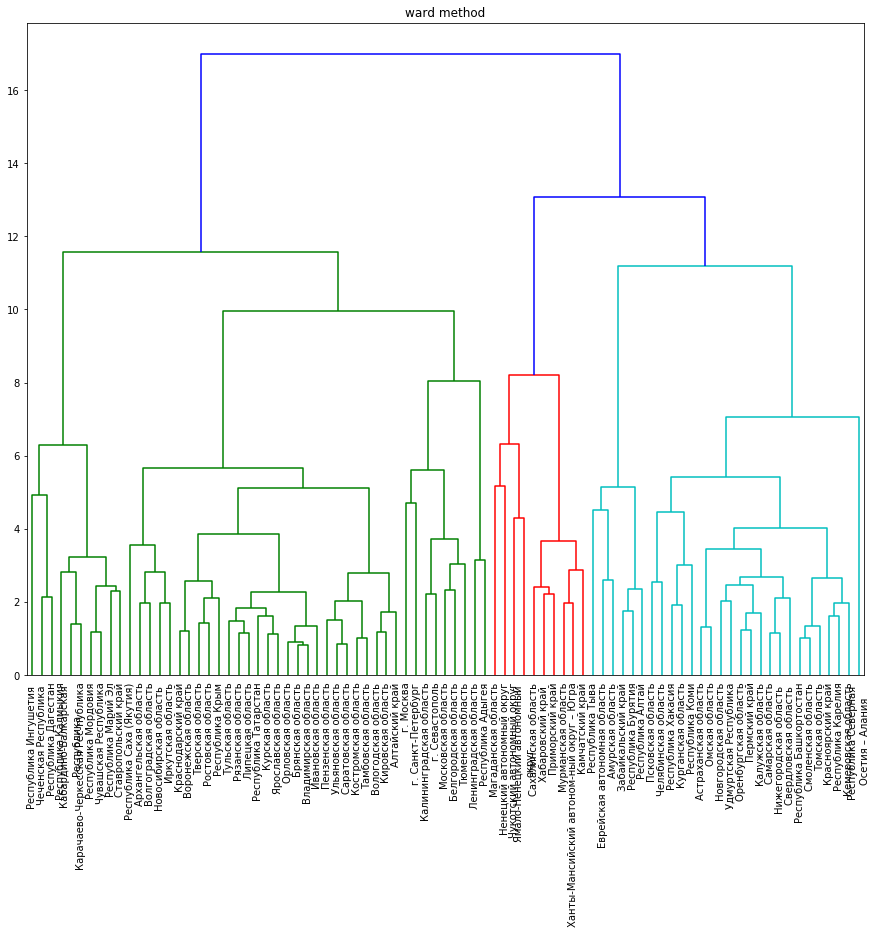

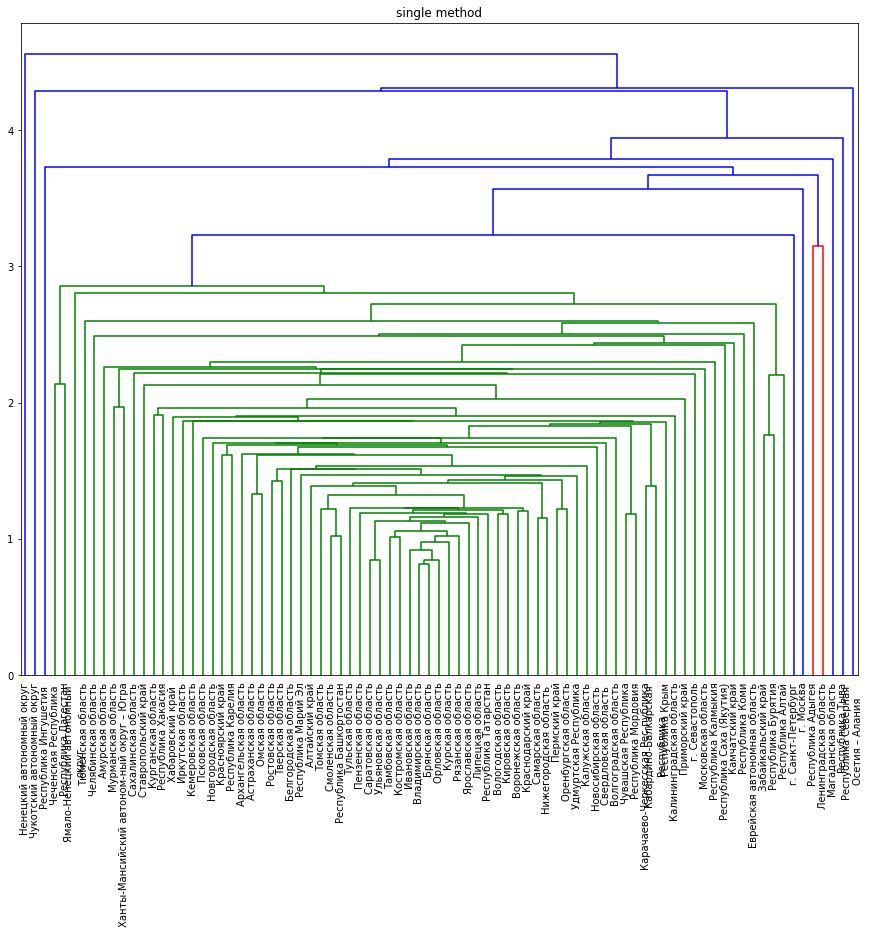

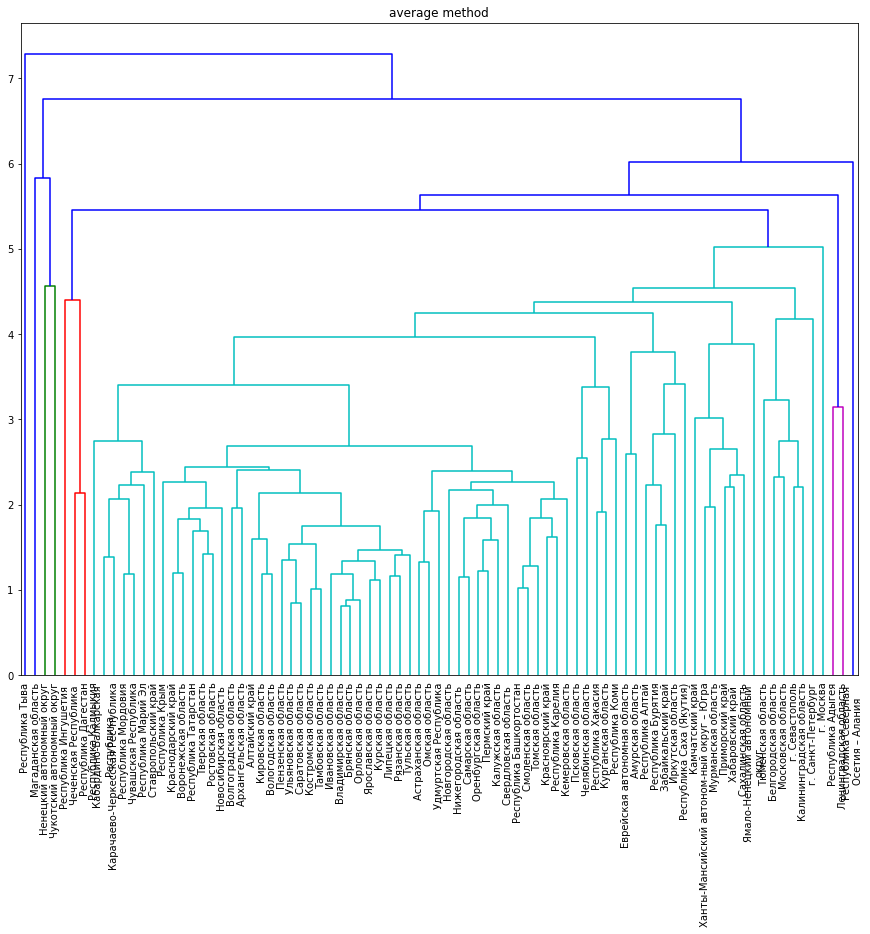

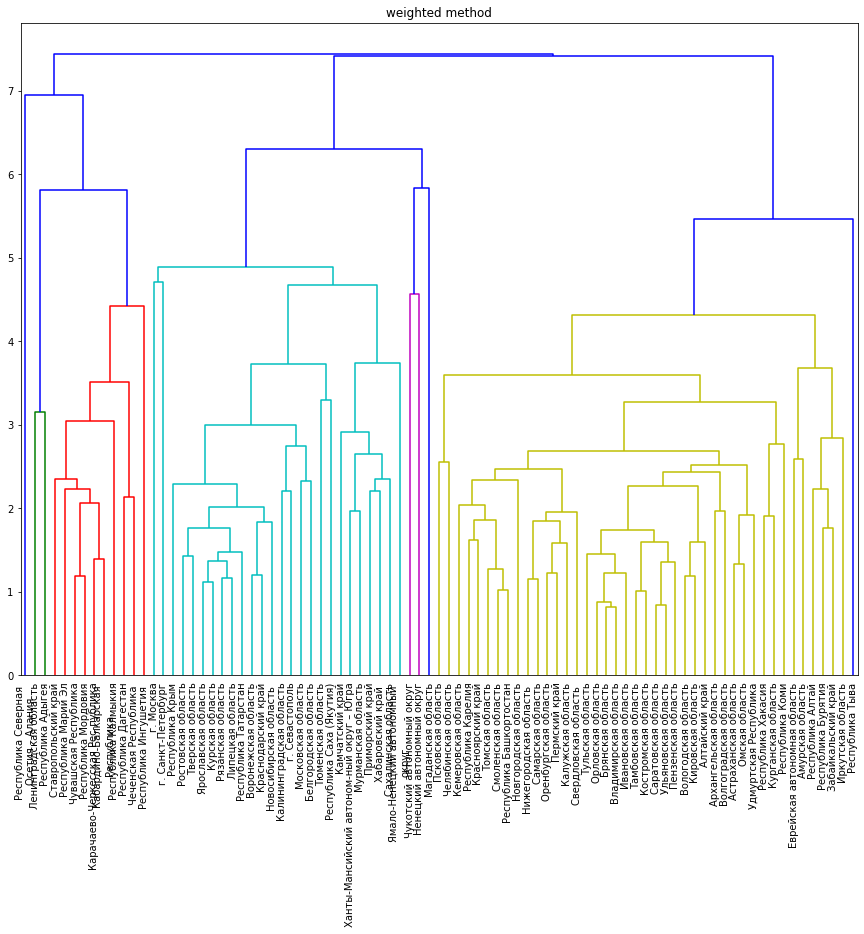

In [4]:
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    #строим дендрограмму

    plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

    plt.title('{} method'.format(method))
   

## Опционально. Удаление выбросов.

In [5]:
#Проверка с помощью k-means

In [6]:
#Избавление от выбросов (опционально)

## 1.4. Кластеризация.

In [7]:
CLUSTER_METHODS = ["complete", "ward", "kmeans", "single", "average",'weighted']
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 6,
    "kmeans"  : 6,
    "single" : 6,
    "average" : 5,
    "weighted" : 5,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled_data)
#метод варда
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled_data);
#метод kmeans
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=36)
kmeans.fit(scaled_data);
#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled_data)
#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled_data)
#метод взвешенного попарного среднего
Z=scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled_data))
weighted=scipy.cluster.hierarchy.fcluster(Z, 6, criterion='distance')
weighted

array([3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 1, 4, 3, 4, 1,
       3, 3, 3, 4, 3, 3, 4, 1, 4, 5, 4, 4, 5, 3, 3, 4, 3, 3, 3, 3, 3, 4,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 4, 1, 1, 4, 2, 4, 3, 3, 4, 4, 3, 3,
       4, 3, 3, 1, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 1, 1, 5, 4, 4],
      dtype=int32)

## 1.5. Работа с метками кластеров. Построение графиков средних значений.

In [8]:
#дополнение меток кластеров в исходный ДФ
scaled_data['complete'] = complete.labels_
scaled_data['ward'] = ward.labels_
scaled_data['kmeans'] = kmeans.labels_
scaled_data['single'] = single.labels_
scaled_data['average'] = average.labels_
scaled_data['weighted']= weighted

def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled_data[scaled_data[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled_data[scaled_data[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}
dfs = []
path = "means.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )


    means[method].to_excel(writer, sheet_name = '{} means'.format(method))
writer.save()

for method in CLUSTER_METHODS:
    print(means[method])


                  x1        x2        x3        x4        x5        x6  \
complete_0 -0.362160  0.925054 -1.448050 -0.675003  0.453656 -0.634830   
complete_1 -2.198722 -1.006188  0.197844  3.142095  0.336004 -0.109225   
complete_2  0.234843  0.255362  0.077086 -0.357637 -0.352106  0.441962   
complete_3  0.175131 -0.479885  0.366523  0.220502  0.118259 -0.334706   
complete_4  0.326751 -0.085159 -1.805853 -0.554295 -1.137743  3.797926   
complete_5 -0.792130  2.009857  0.448306 -0.483252 -0.610166  2.532753   

                  x7        x8        x9       x10  count  
complete_0 -0.935701 -0.880640 -0.952928  0.604430   12.0  
complete_1  0.174639  1.027436  1.925791  2.368913    3.0  
complete_2  0.469468  0.790372  0.641242  0.126729   24.0  
complete_3 -0.188121 -0.299131 -0.278125 -0.411223   42.0  
complete_4 -0.042534 -0.649358 -1.442141  2.472200    1.0  
complete_5  2.460293  0.576436  1.130455 -0.867407    3.0  
              x1        x2        x3        x4        x5     

## 1.6. Построение графиков средних.

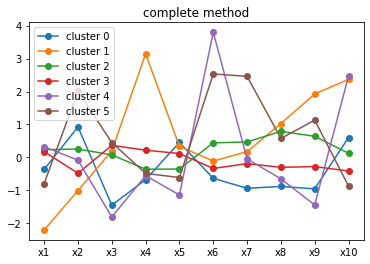

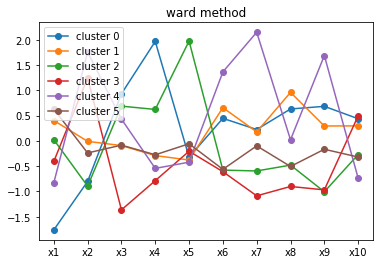

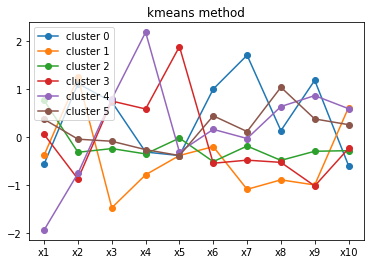

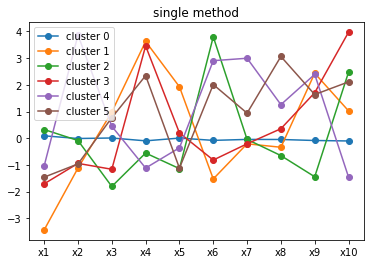

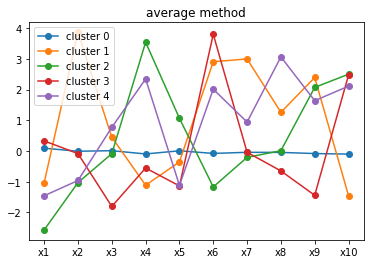

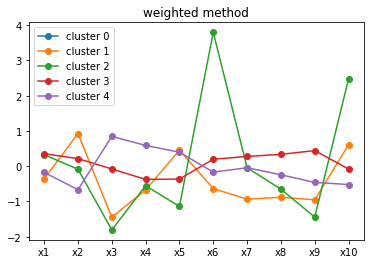

In [9]:
for method in CLUSTER_METHODS:
    # в cur_mean записывается элемент словаря means, соот-ветствующий ключу method (т.е. средние значения признаков в кластерых для метода method)
    cur_mean = means[method] 
    plt.figure(figsize=(6,4))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1].values, marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[0][:-2])) #назва-ние 


## 1.7. Выгрузка элементов в кластерах.

In [10]:
cluster_dict = {}
path = "members.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    dfs = []  
     #для каждого кластера проходимся по объектам и запи-сываем их в словарь
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled_data[scaled_data[method]==i][features]
        
        #Записываем элементы кластеров в файл members. Файл создается в той же директории, где лежит ноутбук с кодом
        cluster_dict['{}_{}'.format(method, i)].to_excel(writer, sheet_name = '{}_{}'.format(method, i))
        
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'
              .format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['Кабардино-Балкарская \nРеспублика' 'Карачаево-Черкесская Рес-публика'
 'Ленинградская область' 'Республика Адыгея' 'Республика Дагестан'
 'Республика Ингушетия ' 'Республика Калмыкия' 'Республика Марий Эл'
 'Республика Мордовия' 'Ставропольский край' 'Чеченская Республика '
 'Чувашская Республика']
Состав кластера 1: ['Магаданская область' 'Ненецкий автономный округ'
 'Чукотский автономный округ']
Состав кластера 2: ['Астраханская область' 'Забайкальский край' 'Иркутская область'
 'Калужская область' 'Кемеровская область' 'Красноярский край'
 'Курганская область' 'Нижегородская область ' 'Новгородская область'
 'Омская область' 'Оренбургская область' 'Пермский край'
 'Псковская область' 'Республика Алтай' 'Республика Башкортостан'
 'Республика Бурятия' 'Республика Карелия' 'Республика Коми'
 'Республика Хакасия' 'Самарская область' 'Смоленская область'
 'Томская область' 'Удмуртская Республика' 'Челябинская область']
Состав кластера 3: ['Алтайский 

## 1.8. Функционал качества разбиения.

In [11]:
def Q(method_num, mean_data_row):
    q = 0 
    for i in range(len(method_num)): 
        tmp=0
        for j, feature in zip(range(len(features)), features):
            tmp = tmp + (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
            q = q + tmp
        return q

## 1.9. Таблица средних.

In [12]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
mean_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,count
complete_0,-0.362160,0.925054,-1.448050,-0.675003,0.453656,-0.634830,-0.935701,-0.880640,-0.952928,0.604430,12.0
complete_1,-2.198722,-1.006188,0.197844,3.142095,0.336004,-0.109225,0.174639,1.027436,1.925791,2.368913,3.0
complete_2,0.234843,0.255362,0.077086,-0.357637,-0.352106,0.441962,0.469468,0.790372,0.641242,0.126729,24.0
complete_3,0.175131,-0.479885,0.366523,0.220502,0.118259,-0.334706,-0.188121,-0.299131,-0.278125,-0.411223,42.0
complete_4,0.326751,-0.085159,-1.805853,-0.554295,-1.137743,3.797926,-0.042534,-0.649358,-1.442141,2.472200,1.0
complete_5,-0.792130,2.009857,0.448306,-0.483252,-0.610166,2.532753,2.460293,0.576436,1.130455,-0.867407,3.0
ward_0,-1.762039,-0.803172,0.931340,1.967207,-0.322228,0.445218,0.224482,0.630788,0.682875,0.437450,10.0
ward_1,0.402602,-0.009979,-0.093278,-0.291388,-0.379478,0.656982,0.176662,0.959103,0.294091,0.296135,22.0
ward_2,0.024120,-0.895924,0.686842,0.621769,1.974878,-0.578497,-0.595553,-0.479751,-1.007544,-0.270638,9.0
ward_3,-0.407874,1.247738,-1.365756,-0.787341,-0.205195,-0.609713,-1.087633,-0.902612,-0.969838,0.494258,10.0


In [13]:
Dw=pd.DataFrame(columns=features)
quality=pd.DataFrame(columns=['Q1','method'])
for j in CLUSTER_METHODS:
    for i in scaled_data[j].unique():
        Dw=Dw.append(((scaled_data[scaled_data[j]==i][features]-
            pd.pivot_table(scaled_data,columns=j)[4:].loc[:,i])**2).sum(),ignore_index=True)
    print(f'Q1={np.sum(Dw.to_numpy())}, method: {j}',)
    quality=quality.append({'Q1':np.sum(Dw.to_numpy()),'method':j},ignore_index=True)
    Dw=pd.DataFrame(columns=features)
quality.T

Q1=503.49551418083473, method: complete
Q1=430.8641410808043, method: ward
Q1=422.86319657851766, method: kmeans
Q1=655.1222898061046, method: single
Q1=665.5262477862489, method: average
Q1=551.6630366696475, method: weighted


,0,1,2,3,4,5
Q1,503.496,430.864,422.863,655.122,665.526,551.663
method,complete,ward,kmeans,single,average,weighted


## 1.10. Качество разбиения по каждому методу.